Привет, меня зовут Гребенюк Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>❌ Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-success">
<b>Общее впечатление:</b> 
    
- Спасибо за работу, определенно могу сказать, что выполнена она на высокм уровне :)
- У меня есть пара ремарок, которые помогут тебе сделать следующие проекты еще лучше.
- Работа принята, поздравляю и желаю удачи в дальнейшем обучении :)
    
</div>



# Анализ тарифов "Смарт" и "Ультра" оператора связи "Мегалайн".

## Общая информация о задаче и входных данных

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Задача проекта**: сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

`Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.`

## Обзор данных
Данные предоставлены в пяти таблицах.
1. `users` - информация о пользователе
    - user_id — уникальный идентификатор пользователя
    - first_name — имя пользователя
    - last_name — фамилия пользователя
    - age — возраст пользователя (годы)
    - reg_date — дата подключения тарифа (день, месяц, год)
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - city — город проживания пользователя
    - tariff — название тарифного плана


2. `calls` - информация о звонках
    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок.
    
    
3. `messages` - информация о сообщениях
    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение
    
    
4. `internet` - информация об интернет-сессиях
    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя
    
    
5. `tariffs` - информация о тарифах
    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> Отличное введение в работу!

### Загрузка данных
Данные предоставлены в виде csv файлов, произведем их загрузку.

In [1]:
# ячейка для подключения необходимых библиотек и базовых настроек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy import stats as st
pd.set_option("display.max_columns", None)

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> здорово, что все импорты собраны в начале проекта!

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

#### Посмотрим таблицу `users`

In [3]:
display(users.head())
display(users.describe())
print(users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
ко всем датафреймам ты применяешь один и тотже набор инструментов для знакомства с данными. Имеет смысл вынести их в одну универсальную функцию

Данные в таблице предоставлены типами int64, object, потребуется перевести `reg_date` в формат datetime64.
В столбце `churn_date` присутствует большое количество пропусков. Статистики по количественным переменным выглядят правдоподобно.

#### Посмотрим таблицу `calls`

In [4]:
display(calls.head())
display(calls.describe())
print(calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


Данные в таблице предоставлены типами int64, float64, object, потребуется перевести `call_date` в формат datetime64.
Пропуски в данных отсутствуют. Статистики по количественным переменным выглядят правдоподобно.

#### Посмотрим таблицу `messages`

In [5]:
display(messages.head())
display(messages.describe())
print(messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


Данные в таблице предоставлены типами int64, object, потребуется перевести `message_date` в формат datetime64.
Пропуски в данных отсутствуют. Статистики по количественным переменным выглядят правдоподобно.

#### Посмотрим таблицу `internet`

In [6]:
display(internet.head())
display(internet.describe())
print(internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


Данные в таблице предоставлены типами int64, float64, object, потребуется перевести `session_date` в формат datetime64.
Пропуски в данных отсутствуют. Имеется неопределённый столбец `Unnamed: 0`.  Статистики по количественным переменным выглядят правдоподобно.

#### Посмотрим таблицу `tariffs`

In [7]:
display(tariffs.head())
print(tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


Таблица состоит из двух строк - тарифные планы. Данные в таблице предоставлены типами int64, object.
Пропуски в данных отсутствуют.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> с данными познакомились, отлично!

## Предобработка данных

### Предобработка таблицы `users`

Проверим на явные дубликаты.

In [8]:
print('Количество явных дубликатов в таблице "users":', users.duplicated().sum())

Количество явных дубликатов в таблице "users": 0


Проверим неявное дублирование в столбце `city`

In [9]:
print(users['city'].sort_values().unique())

['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 'Ростов-на-Дону' 'Рязань' 'Самара' 'Санкт-Петербург' 'Саранск' 'Саратов'
 'Севастополь' 'Смоленск' 'Сочи' 'Ставрополь' 'Стерлитамак' 'Сургут'
 'Тамбов' 'Тверь' 'Тольятти' 'Томск' 'Тула' 'Тюмень' 'Улан-Удэ'
 'Ульяновск' 'Уфа' 'Хабаровск' 'Химки' 'Чебоксары' 'Челябинск' 'Череповец'
 'Чита' 'Якутск' 'Ярославль']


Так как число уникальных значений городов не велико, то можно визуально оценить отсутствие ошибок.

Приведём тип данных столбца `reg_date` к формату datetime64.

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print('Тип данных столбца "reg_date":', users['reg_date'].dtypes)

Тип данных столбца "reg_date": datetime64[ns]


<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> Принято выносить из кода строковые литералы. 
Если ТЗ поменяют (например, для американцев более естественно писать дату `'%m.%d.%Y'`), 
то это не потребует внесения изменений в код, отвечающий за логику.
По `pep-8` константам нужно давать говорящие названия и именовать в верхнем регистре.

Столбец с пропусками `churn_date` содержит даты прекращения пользования тарифом пользователями (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Это значит, что пропуски являются нормой для этого столбца, заполнять их не нужно. Наоборот, заполненные строки указывают на то, что последний месяц использования тарифа был неполным, поэтому значения по нему будут влиять на результаты исследования.

**В последующем удалим данные для этих пользователей за последний месяц использования тарифа.**

Создадим таблицу `churn` для данных пользователей содержащий: "user_id" и "last_month_use" (последний месяц использования тарифа). Прменим для последующих таблиц данный фильтр.

In [11]:
# создадим таблицу 'churn' для выбывших клиентов, оставим только столбцы 'user_id','churn_date'.
churn = users[~users['churn_date'].isna()].loc[:,['user_id','churn_date']].reset_index(drop=True)
# создадим столбец 'month' и запоним его значением месяца
churn['month'] = pd.to_datetime(churn['churn_date'], format='%Y-%m-%d').dt.month
# удалим столбец 'churn_date'
churn = churn.drop(columns='churn_date')
print('Первые две строк таблицы "churn"')
display(churn.head(2))

Первые две строк таблицы "churn"


,user_id,month
0,1019,10
1,1020,12


<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
старайся пояснения к исследованию всегда писать в маркдаун-ячейках. Через # Обычно пишутся технические комментарии к нетривиальным участкам кода

Создадим функцию `last_month_delet` для удаения данных по таблице `churn`. Данную функуию в последующем применим к таблицам `calls`, `messages` и `internet`.

In [12]:
# 'table' датафрейм со столбцами 'user_id' и 'month'
# churn_id пересечение table и churn по столбцам 'user_id' и 'month'
# удалим из table строки в которых значения в столбце id совпадают со значениями из churn_id
# и возвратим таблицу как результат работы функции

def last_month_delet(table):
    churn_id = pd.merge(table, churn, on=['user_id','month'], how='inner')
    return table.loc[~table.id.isin(churn_id.id)].reset_index(drop=True)
    

### Предобработка таблицы `calls`

Проверим на явные дубликаты.

In [13]:
print('Количество явных дубликатов в таблице "calls":', calls.duplicated().sum())

Количество явных дубликатов в таблице "calls": 0


Приведём тип данных столбца `call_date` к формату datetime64.

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print('Тип данных столбца "call_date":', calls['call_date'].dtypes)

Тип данных столбца "call_date": datetime64[ns]


<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
и во всех наших датафреймах давай константу с форматом применим

Проверим, что данные предоставлены только за 2018 год.

In [15]:
print(f"Диапазон дат в таблице 'calls' c {calls['call_date'].min()} по {calls['call_date'].max()}.")

Диапазон дат в таблице 'calls' c 2018-01-01 00:00:00 по 2018-12-31 00:00:00.


Так как все предоставленные данные относятся только к 2018 году и все расчёты производятся относительно месяца, то создадим столбец `month`.

In [16]:
# создадим столбец 'month' и запоним его значением месяца
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
print('Первые две строки таблицы "calls"')
display(calls.head(2))

Первые две строки таблицы "calls"


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8


Применим фильтр по таблице `churn`, удалим звонки за последний месяц для ушедших абонентов.

In [17]:
calls = last_month_delet(calls)

Согласно тарифной политики приведём длительность каждого звонка к целым минутам, с округлением в большую сторону.

In [18]:
calls['duration'] = calls['duration'].apply(ceil)
print('Первые две строки таблицы "calls"')
display(calls.head(2))

Первые две строки таблицы "calls"


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8


**Таблица `calls` подготовлена для последующей расчётов.**

### Предобработка таблицы `messages`

Проверим на явные дубликаты.

In [19]:
print('Количество явных дубликатов в таблице "messages":', messages.duplicated().sum())

Количество явных дубликатов в таблице "messages": 0


Приведём тип данных столбца `message_date` к формату datetime64.

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print('Тип данных столбца "message_date":', messages['message_date'].dtypes)

Тип данных столбца "message_date": datetime64[ns]


Проверим, что данные предоставлены только за 2018 год.

In [21]:
print(f"Диапазон дат в таблице 'messages' c {messages['message_date'].min()} по {messages['message_date'].max()}.")

Диапазон дат в таблице 'messages' c 2018-01-02 00:00:00 по 2018-12-31 00:00:00.


Так как все предоставленные данные относятся только к 2018 году и все расчёты производятся относительно месяца, то создадим столбец `month`.

In [22]:
# создадим столбец 'month' и запоним его значением месяца
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
print('Первые две строки таблицы "messages"')
display(messages.head(2))

Первые две строки таблицы "messages"


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10


Применим фильтр по таблице `churn`, удалим сообщения за последний месяц для ушедших абонентов.

In [23]:
messages = last_month_delet(messages)

**Таблица `messages` подготовлена для последующей расчётов.**

### Предобработка таблицы `internet`

Проверим на явные дубликаты.

In [24]:
print('Количество явных дубликатов в таблице "internet":', internet.duplicated().sum())

Количество явных дубликатов в таблице "internet": 0


Удалим столбец `Unnamed: 0`, который является дубликатом индексов.

In [25]:
internet = internet.drop(columns='Unnamed: 0')

Приведём тип данных столбца `session_date` к формату datetime64.

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print('Тип данных столбца "session_date":', internet['session_date'].dtypes)

Тип данных столбца "session_date": datetime64[ns]


Проверим, что данные предоставлены только за 2018 год.

In [27]:
print(f"Диапазон дат в таблице 'internet' c {internet['session_date'].min()} по {internet['session_date'].max()}.")

Диапазон дат в таблице 'internet' c 2018-01-01 00:00:00 по 2018-12-31 00:00:00.


Так как все предоставленные данные относятся только к 2018 году и все расчёты производятся относительно месяца, то создадим столбец `month`.

In [28]:
# создадим столбец 'month' и запоним его значением месяца
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
print('Первые две строки таблицы "internet"')
display(internet.head(2))

Первые две строки таблицы "internet"


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9


Применим фильтр по таблице `churn`, удалим использование интернета за последний месяц для ушедших абонентов.

In [29]:
internet = last_month_delet(internet)

**Таблица `internet` подготовлена для последующей расчётов.**

### Предобработка таблицы `tariffs`

Так как расчёты за месяц ведутся относительно ГБ использованного трафика, пересчитаем значения столбца `mb_per_month_included` и переименуем его в `gb_per_month_included`.

In [30]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


**Таблица `tariffs` подготовлена для последующей расчётов.**

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> таблицы предобработаны и готовы к работе, отлично!

### Создадим сводную таблицу `users_summary`, в которой сохраним основные показатели месячного использования услуг связи пользователями

Создадим сводную таблицу `calls_pivot` для всех пользователей совершавших звонки, расчитав количество звонков и общую продолжительность звонков за каждый месяц.

In [31]:
calls_pivot = calls.pivot_table(index = 'user_id', columns = 'month', values = 'duration', aggfunc = ['count','sum'])
calls_pivot = calls_pivot.rename( columns = {'count':'calls_count', 'sum':'duration_sum'})
display(calls_pivot.head(2))

calls_count                                                        \
month            1   2   3   4     5     6     7     8     9     10    11   
user_id                                                                     
1000            NaN NaN NaN NaN  22.0  43.0  47.0  52.0  58.0  57.0  43.0   
1001            NaN NaN NaN NaN   NaN   NaN   NaN   NaN   NaN   NaN  59.0   

              duration_sum                                                 \
month      12           1   2   3   4      5      6      7      8      9    
user_id                                                                     
1000     46.0          NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0   
1001     63.0          NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   

                              
month       10     11     12  
user_id                       
1000     350.0  338.0  333.0  
1001       NaN  430.0  414.0

Создадим сводную таблицу `messages_pivot` для всех пользователей отправлявших сообщения, расчитав количество сообщений за каждый месяц.

In [32]:
messages_pivot = messages.pivot_table(index = 'user_id', columns = 'month', values = 'id', aggfunc = ['count'])
messages_pivot = messages_pivot.rename( columns = {'count':'messages_count'})
display(messages_pivot.head(2))

messages_count                                                        \
month               1   2   3   4     5     6     7     8     9     10    11   
user_id                                                                        
1000               NaN NaN NaN NaN  22.0  60.0  75.0  81.0  57.0  73.0  58.0   
1002               NaN NaN NaN NaN   NaN   4.0  11.0  13.0   4.0  10.0  16.0   

               
month      12  
user_id        
1000     70.0  
1002     12.0

Создадим сводную таблицу `internet_pivot` для всех пользователей использовавших интернет, расчитав количество израсходованного трафика в гигабайтах за каждый месяц.

In [33]:
internet_pivot = internet.pivot_table(index = 'user_id', columns = 'month', values = 'mb_used', aggfunc = ['sum'])
internet_pivot = pd.DataFrame(data = np.ceil(internet_pivot.values/1024), columns = internet_pivot.columns, index = internet_pivot.index)
internet_pivot = internet_pivot.rename( columns = {'sum':'gb_used'})
display(internet_pivot.head(2))

gb_used                                                           
month        1   2   3   4    5     6     7     8     9     10    11    12
user_id                                                                   
1000        NaN NaN NaN NaN  3.0  23.0  14.0  14.0  15.0  15.0  15.0  10.0
1001        NaN NaN NaN NaN  NaN   NaN   NaN   NaN   NaN   NaN  18.0  14.0

Объединим сводные таблицы `calls_pivot`, `messages_pivot`, `internet_pivot` в одной талице `users_summary`.

In [34]:
users_summary = pd.merge(calls_pivot, messages_pivot, on=['user_id'], how='outer').merge(internet_pivot, on=['user_id'], how='outer')
display(users_summary.head(2))
print('Количество клиентов пользовавшихся услугами связи:', len(users_summary.index))

calls_count                                                        \
month            1   2   3   4     5     6     7     8     9     10    11   
user_id                                                                     
1000            NaN NaN NaN NaN  22.0  43.0  47.0  52.0  58.0  57.0  43.0   
1001            NaN NaN NaN NaN   NaN   NaN   NaN   NaN   NaN   NaN  59.0   

              duration_sum                                                 \
month      12           1   2   3   4      5      6      7      8      9    
user_id                                                                     
1000     46.0          NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0   
1001     63.0          NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   

                             messages_count                                \
month       10     11     12             1   2   3   4     5     6     7    
user_id                                                                     
1000     350.0  338.0  333.0            NaN NaN NaN NaN  22.0  60.0  75.0   
1001       NaN  430.0  414.0            NaN NaN NaN NaN   NaN   NaN   NaN   

                                      gb_used                               \
month      8     9     10    11    12      1   2   3   4    5     6     7    
user_id                                                                      
1000     81.0  57.0  73.0  58.0  70.0     NaN NaN NaN NaN  3.0  23.0  14.0   
1001      NaN   NaN   NaN   NaN   NaN     NaN NaN NaN NaN  NaN   NaN   NaN   

                                       
month      8     9     10    11    12  
user_id                                
1000     14.0  15.0  15.0  15.0  10.0  
1001      NaN   NaN   NaN  18.0  14.0

Количество клиентов пользовавшихся услугами связи: 498


В сводной таблице отсутствует информация по действиям двух клиентов, похоже они не пользовались услугами связи в 2018 году, либо пользовались менее одного месяца и были удалены функцией `last_month_delet`.

In [35]:
print('Клиенты по которым отсутствует информация по действиям в сети оператора.')
users[~users['user_id'].isin(users_summary.index)]

Клиенты по которым отсутствует информация по действиям в сети оператора.


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


### Разделим таблицу `users_summary` на две, согласно используемого тарифа:
1. `users_summary_smart` для тарифа "Смарт",
2. `users_summary_ultra` для тарифа "Ультра".

In [36]:
users_summary_smart = users_summary[users_summary.index.isin(users.query('tariff == "smart"')['user_id'])]
users_summary_ultra = users_summary[users_summary.index.isin(users.query('tariff == "ultra"')['user_id'])]
print('\nЧисло абонентов тарифа "Смарт":', len(users_summary_smart.index))
print('Первые две строки таблицы "users_summary_smart"')
display(users_summary_smart.head(2))
print('\nЧисло абонентов тарифа "Ультра":', len(users_summary_ultra.index))
print('Первые две строки таблицы "users_summary_ultra"')
display(users_summary_ultra.head(2))


Число абонентов тарифа "Смарт": 350
Первые две строки таблицы "users_summary_smart"


calls_count                                                            \
month            1   2   3   4   5     6     7     8     9     10    11    12   
user_id                                                                         
1001            NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN   NaN  59.0  63.0   
1002            NaN NaN NaN NaN NaN  15.0  26.0  42.0  36.0  33.0  32.0  33.0   

        duration_sum                                                     \
month             1   2   3   4   5      6      7      8      9      10   
user_id                                                                   
1001             NaN NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   
1002             NaN NaN NaN NaN NaN  117.0  214.0  289.0  206.0  212.0   

                      messages_count                                        \
month       11     12             1   2   3   4   5    6     7     8    9    
user_id                                                                      
1001     430.0  414.0            NaN NaN NaN NaN NaN  NaN   NaN   NaN  NaN   
1002     243.0  236.0            NaN NaN NaN NaN NaN  4.0  11.0  13.0  4.0   

                          gb_used                                          \
month      10    11    12      1   2   3   4   5     6     7     8     9    
user_id                                                                     
1001      NaN   NaN   NaN     NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN   
1002     10.0  16.0  12.0     NaN NaN NaN NaN NaN  11.0  18.0  20.0  17.0   

                           
month      10    11    12  
user_id                    
1001      NaN  18.0  14.0  
1002     14.0  19.0  18.0


Число абонентов тарифа "Ультра": 148
Первые две строки таблицы "users_summary_ultra"


calls_count                                                           \
month            1   2   3   4     5     6     7     8      9      10     11   
user_id                                                                        
1000            NaN NaN NaN NaN  22.0  43.0  47.0  52.0   58.0   57.0   43.0   
1003            NaN NaN NaN NaN   NaN   NaN   NaN  55.0  134.0  108.0  115.0   

               duration_sum                                                 \
month       12           1   2   3   4      5      6      7      8      9    
user_id                                                                      
1000      46.0          NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0   
1003     108.0          NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0   

                             messages_count                                \
month       10     11     12             1   2   3   4     5     6     7    
user_id                                                                     
1000     350.0  338.0  333.0            NaN NaN NaN NaN  22.0  60.0  75.0   
1003     855.0  824.0  802.0            NaN NaN NaN NaN   NaN   NaN   NaN   

                                      gb_used                               \
month      8     9     10    11    12      1   2   3   4    5     6     7    
user_id                                                                      
1000     81.0  57.0  73.0  58.0  70.0     NaN NaN NaN NaN  3.0  23.0  14.0   
1003     37.0  91.0  83.0  94.0  75.0     NaN NaN NaN NaN  NaN   NaN   NaN   

                                       
month      8     9     10    11    12  
user_id                                
1000     14.0  15.0  15.0  15.0  10.0  
1003      9.0  13.0  15.0  12.0  10.0

Создадим функцию расчёта помесячной выручки с каждого абонента, которую применим для таблиц: `users_summary_smart`, `users_summary_smart`. 

Функция будет принимать два параметра:
1. `talbe_summary` - таблица для которой производится расчёт,
2. `tariff` - тип тарифного плана, 0 - Смарт, 1 - Ультра.

In [37]:
# функция, парметр таблица и тип тарифа.
def income(talbe_summary, tariff):
    # создадим маску указывающую на активность пользователя, по ней будет определяться
    # наличие договора у данного пользователя для начисления абонентской платы
    activ_user = (
    talbe_summary['calls_count'].notna() 
    | talbe_summary['duration_sum'].notna() 
    | talbe_summary['messages_count'].notna() 
    | talbe_summary['gb_used'].notna()
    )
    # формирование таблицы ежемесячного платежа
    table_income = pd.DataFrame(
        np.nan_to_num((talbe_summary['duration_sum'][talbe_summary['duration_sum'] > tariffs.loc[tariff, 'minutes_included']]
                       - tariffs.loc[tariff, 'minutes_included']) * tariffs.loc[tariff, 'rub_per_minute'],copy=False, nan=0.0)
        + np.nan_to_num((talbe_summary['messages_count'][talbe_summary['messages_count'] > tariffs.loc[tariff, 'messages_included']]
                         - tariffs.loc[tariff, 'messages_included']) * tariffs.loc[tariff, 'rub_per_message'],copy=False, nan=0.0)
        + np.nan_to_num((talbe_summary['gb_used'][talbe_summary['gb_used'] > tariffs.loc[tariff, 'gb_per_month_included']]
                         - tariffs.loc[tariff, 'gb_per_month_included']) * tariffs.loc[tariff, 'rub_per_gb'],copy=False, nan=0.0)
        + activ_user.replace(True, tariffs.loc[tariff, 'rub_monthly_fee']).replace(False, 0)
    )
    # установка двух уровневого обозначения столбцов: верхний уровень 'income', нижний уровень месяц от 1 до 12
    table_income.columns = pd.MultiIndex.from_tuples([('income', i) for i in range(1,13)])
    return table_income

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличная функция!

Расширим таблицу `users_summary_smart`, дописав в неё помесячную выручку с каждого пользователя тарифа "Смарт", применим для этого ранее созданную функцию `income`.

In [38]:
users_summary_smart = users_summary_smart.merge(income(users_summary_smart, 0), on=['user_id'])
print('\nПервые две строки полной сводной таблицы по клиентам тарифа "Смарт"')
display(users_summary_smart.head(2))


Первые две строки полной сводной таблицы по клиентам тарифа "Смарт"


calls_count                                                            \
month            1   2   3   4   5     6     7     8     9     10    11    12   
user_id                                                                         
1001            NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN   NaN  59.0  63.0   
1002            NaN NaN NaN NaN NaN  15.0  26.0  42.0  36.0  33.0  32.0  33.0   

        duration_sum                                                     \
month             1   2   3   4   5      6      7      8      9      10   
user_id                                                                   
1001             NaN NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   
1002             NaN NaN NaN NaN NaN  117.0  214.0  289.0  206.0  212.0   

                      messages_count                                        \
month       11     12             1   2   3   4   5    6     7     8    9    
user_id                                                                      
1001     430.0  414.0            NaN NaN NaN NaN NaN  NaN   NaN   NaN  NaN   
1002     243.0  236.0            NaN NaN NaN NaN NaN  4.0  11.0  13.0  4.0   

                          gb_used                                          \
month      10    11    12      1   2   3   4   5     6     7     8     9    
user_id                                                                     
1001      NaN   NaN   NaN     NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN   
1002     10.0  16.0  12.0     NaN NaN NaN NaN NaN  11.0  18.0  20.0  17.0   

                          income                                             \
month      10    11    12     1    2    3    4    5      6       7       8    
user_id                                                                       
1001      NaN  18.0  14.0    0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0   
1002     14.0  19.0  18.0    0.0  0.0  0.0  0.0  0.0  550.0  1150.0  1550.0   

                                       
month       9      10      11      12  
user_id                                
1001       0.0    0.0  1150.0   550.0  
1002     950.0  550.0  1350.0  1150.0

Расширим таблицу `users_summary_ultra`, дописав в неё помесячную выручку с каждого пользователя тарифа "Ультра", применим для этого ранее созданную функцию `income`.

In [39]:
users_summary_ultra = users_summary_ultra.merge(income(users_summary_ultra, 1), on=['user_id'])
print('\nПервые две строки полной сводной таблицы по клиентам тарифа "Ультра"')
display(users_summary_ultra.head(2))


Первые две строки полной сводной таблицы по клиентам тарифа "Ультра"


calls_count                                                           \
month            1   2   3   4     5     6     7     8      9      10     11   
user_id                                                                        
1000            NaN NaN NaN NaN  22.0  43.0  47.0  52.0   58.0   57.0   43.0   
1003            NaN NaN NaN NaN   NaN   NaN   NaN  55.0  134.0  108.0  115.0   

               duration_sum                                                 \
month       12           1   2   3   4      5      6      7      8      9    
user_id                                                                      
1000      46.0          NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0   
1003     108.0          NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0   

                             messages_count                                \
month       10     11     12             1   2   3   4     5     6     7    
user_id                                                                     
1000     350.0  338.0  333.0            NaN NaN NaN NaN  22.0  60.0  75.0   
1003     855.0  824.0  802.0            NaN NaN NaN NaN   NaN   NaN   NaN   

                                      gb_used                               \
month      8     9     10    11    12      1   2   3   4    5     6     7    
user_id                                                                      
1000     81.0  57.0  73.0  58.0  70.0     NaN NaN NaN NaN  3.0  23.0  14.0   
1003     37.0  91.0  83.0  94.0  75.0     NaN NaN NaN NaN  NaN   NaN   NaN   

                                      income                                 \
month      8     9     10    11    12     1    2    3    4       5       6    
user_id                                                                       
1000     14.0  15.0  15.0  15.0  10.0    0.0  0.0  0.0  0.0  1950.0  1950.0   
1003      9.0  13.0  15.0  12.0  10.0    0.0  0.0  0.0  0.0     0.0     0.0   

                                                         
month        7       8       9       10      11      12  
user_id                                                  
1000     1950.0  1950.0  1950.0  1950.0  1950.0  1950.0  
1003        0.0  1950.0  1950.0  1950.0  1950.0  1950.0

### Предобработка данных завершена.
В ходе предобработки данных были получены две сводные таблицы:
1. `users_summary_smart` - помесячная отчётность по клиентам тарифа "Смарт",
2. `users_summary_ultra` - помесячная отчётность по клиентам тарифа "Ультра".

В сводных таблицах помесячно расчитаны следующие величины для каждого пользователя:
1. количество сделанных звонков,
2. израсходованные минуты,
3. количество отправленных сообщений,
4. объём израсходованного интернет-трафика,
5. помесячная выручка с пользователя.

Количество клиентов учтённых в расчётах:
1. тариф "Смарт" 350 пользователей,
2. тариф "Ультра" 148 пользователей.

Можно переходить к анализу данных.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличная работа по разделу!

## Анализ поведения клиентов оператора для тарифов "Смарт" и "Ультра"

### Оценка минут разговора

Оценим помесячное среднее, дисперсию и стандартное отклонение количества минут разговора приходящиеся на одного абонента для тарифов "Смарт" и "Ультра".

In [40]:
print('Среднее количество минут разговора на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.mean(users_summary_smart.duration_sum.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.mean(users_summary_ultra.duration_sum.melt().value):.2f}.\n')
print('Дисперсия количества минут разговора на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.var(users_summary_smart.duration_sum.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.var(users_summary_ultra.duration_sum.melt().value):.2f}.\n')
print('Стандартное отклонение количества минут разговора на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.std(users_summary_smart.duration_sum.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.std(users_summary_ultra.duration_sum.melt().value):.2f}.')

Среднее количество минут разговора на доного абонента в месяц:
 - тариф "Смарт" - 421.03,
 - тариф "Ультра" - 550.80.

Дисперсия количества минут разговора на доного абонента в месяц:
 - тариф "Смарт" - 35693.44,
 - тариф "Ультра" - 93316.30.

Стандартное отклонение количества минут разговора на доного абонента в месяц:
 - тариф "Смарт" - 188.93,
 - тариф "Ультра" - 305.48.


Построим гистограммы распределения помесячного количества минут разговора приходящиеся на одного абонента для тарифов "Смарт" и "Ультра".

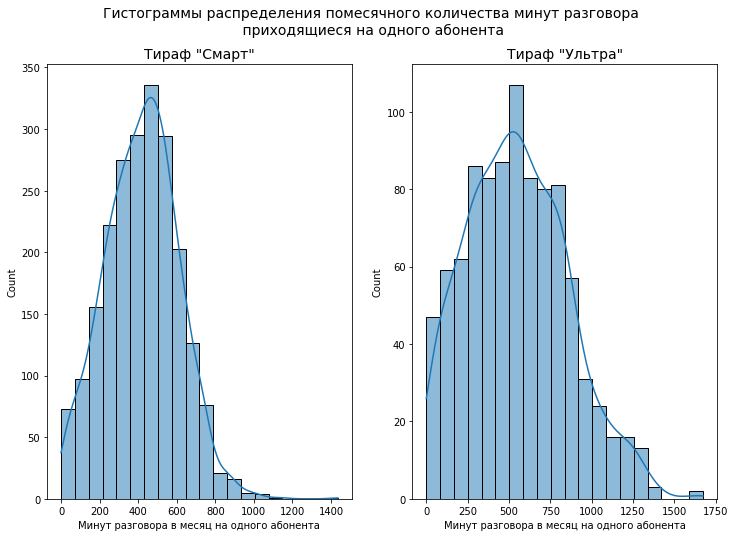

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
fig.suptitle('Гистограммы распределения помесячного количества минут разговора\n приходящиеся на одного абонента', fontsize=14)
axes[0].set_title('Тираф "Смарт"', fontsize=14)
axes[1].set_title('Тираф "Ультра"', fontsize=14)
axes[0].set_xlabel('Минут разговора в месяц на одного абонента')
axes[1].set_xlabel('Минут разговора в месяц на одного абонента')
sns.histplot(data = users_summary_smart.duration_sum.melt().value, bins = 20, ax = axes[0], kde = True)
sns.histplot(data = users_summary_ultra.duration_sum.melt().value, bins = 20, ax = axes[1], kde = True)
plt.show()

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> очень наглядно :)

Оба распределения близки по внешнему виду к нормальному. 

Однако просматривается незначительная скошенность влево, вероятно это вызвано большим количеством абонентов заключивших договора в 2018 году, а значит есть неполные месяцы для которых статистика посчитана как за полный месяц пользования. Их можно будет обработать убрав данные по первому месяцу, аналогично договорам закрытым в 2018 году, где были убраны данные за последний месяц. Такие данные небыли предоставлены заказчиком, запросим их дополнително (при отсутствии таких данных, можно будет самостоятельно отфильтровать данные убрав первый месяц использования тарифа, для всех абонентов не имеющих платежей за январь).

Наглядно убедится в том, что имеются договора, по которым полностью отсутствовали операции в первые месяцы года можно построив тепловую карту для платежей первых 20-ти абонентов на примере тарифа "Смарт".

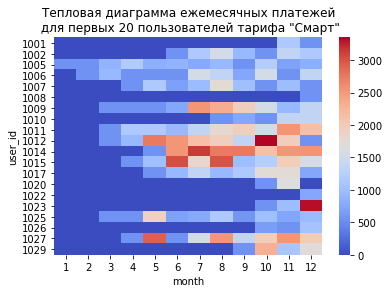

In [42]:
sns.heatmap(users_summary_smart.head(20).income, cmap= 'coolwarm')
plt.title('Тепловая диаграмма ежемесячных платежей\n для первых 20 пользователей тарифа "Смарт"')
plt.show()

Как показывает диаграмма из первых 20-ти абонентов, только один имел договор на начало года, что подтверждает предположение о причинах скошенности в распределении.

### Оценка количества сообщений

Оценим помесячное среднее, дисперсию и стандартное отклонение количества сообщений приходящихся на одного абонента для тарифов "Смарт" и "Ультра".

In [43]:
print('Среднее количество сообщений на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.mean(users_summary_smart.messages_count.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.mean(users_summary_ultra.messages_count.melt().value):.2f}.\n')
print('Дисперсия количества сообщений на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.var(users_summary_smart.messages_count.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.var(users_summary_ultra.messages_count.melt().value):.2f}.\n')
print('Стандартное отклонение количества сообщений на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.std(users_summary_smart.messages_count.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.std(users_summary_ultra.messages_count.melt().value):.2f}.')

Среднее количество сообщений на доного абонента в месяц:
 - тариф "Смарт" - 38.87,
 - тариф "Ультра" - 61.43.

Дисперсия количества сообщений на доного абонента в месяц:
 - тариф "Смарт" - 720.17,
 - тариф "Ультра" - 2114.87.

Стандартное отклонение количества сообщений на доного абонента в месяц:
 - тариф "Смарт" - 26.84,
 - тариф "Ультра" - 45.99.


Построим гистограммы распределения помесячного количества сообщений приходящихся на одного абонента для тарифов "Смарт" и "Ультра".

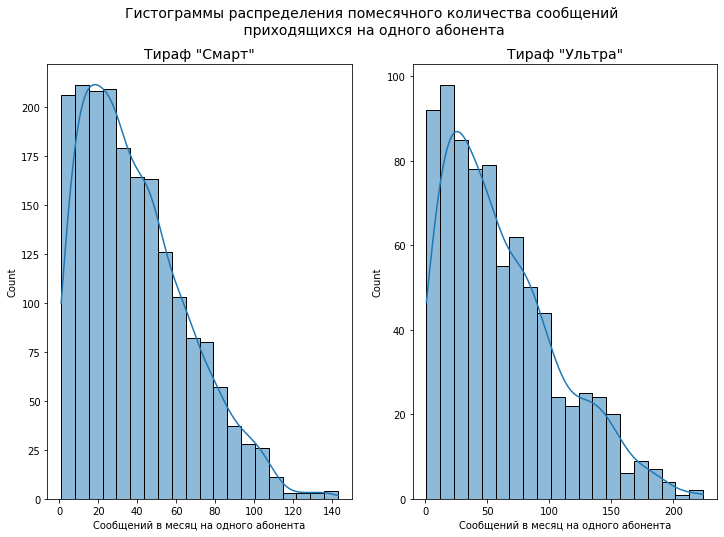

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
fig.suptitle('Гистограммы распределения помесячного количества сообщений\n приходящихся на одного абонента', fontsize=14)
axes[0].set_title('Тираф "Смарт"', fontsize=14)
axes[1].set_title('Тираф "Ультра"', fontsize=14)
axes[0].set_xlabel('Сообщений в месяц на одного абонента')
axes[1].set_xlabel('Сообщений в месяц на одного абонента')
sns.histplot(data = users_summary_smart.messages_count.melt().value, bins = 20, ax = axes[0], kde = True)
sns.histplot(data = users_summary_ultra.messages_count.melt().value, bins = 20, ax = axes[1], kde = True)
plt.show()

Оба распределения близки по внешнему виду к рапределению Пуассона, что характерно для независимых дискреных событий на интервале времени. 

Однако завышение левой стороны также должно присутствовать, как и для продолжительности разговора, по причине неполного использования первого месяца, для абонентов подключившихся в 2018 году.

### Оценка объёма интернет-трафика

Оценим помесячное среднее, дисперсию и стандартное отклонение объёма интернет-трафика приходящегося на одного абонента для тарифов "Смарт" и "Ультра".

In [45]:
print('Средний объём интернет-трафика приходящегося на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.mean(users_summary_smart.gb_used.melt().value):.2f} ГБ,\n'
      f' - тариф "Ультра" - {np.mean(users_summary_ultra.gb_used.melt().value):.2f} ГБ.\n')
print('Дисперсия объёма интернет-трафика приходящегося на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.var(users_summary_smart.gb_used.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.var(users_summary_ultra.gb_used.melt().value):.2f}.\n')
print('Стандартное отклонение объёма интернет-трафика приходящегося на доного абонента в месяц:\n'
      f' - тариф "Смарт" - {np.std(users_summary_smart.gb_used.melt().value):.2f},\n'
      f' - тариф "Ультра" - {np.std(users_summary_ultra.gb_used.melt().value):.2f}.')

Средний объём интернет-трафика приходящегося на доного абонента в месяц:
 - тариф "Смарт" - 16.39 ГБ,
 - тариф "Ультра" - 19.89 ГБ.

Дисперсия объёма интернет-трафика приходящегося на доного абонента в месяц:
 - тариф "Смарт" - 32.72,
 - тариф "Ультра" - 92.11.

Стандартное отклонение объёма интернет-трафика приходящегося на доного абонента в месяц:
 - тариф "Смарт" - 5.72,
 - тариф "Ультра" - 9.60.


Построим гистограммы распределения помесячного объёма интернет-трафика приходящегося на одного абонента для тарифов "Смарт" и "Ультра".

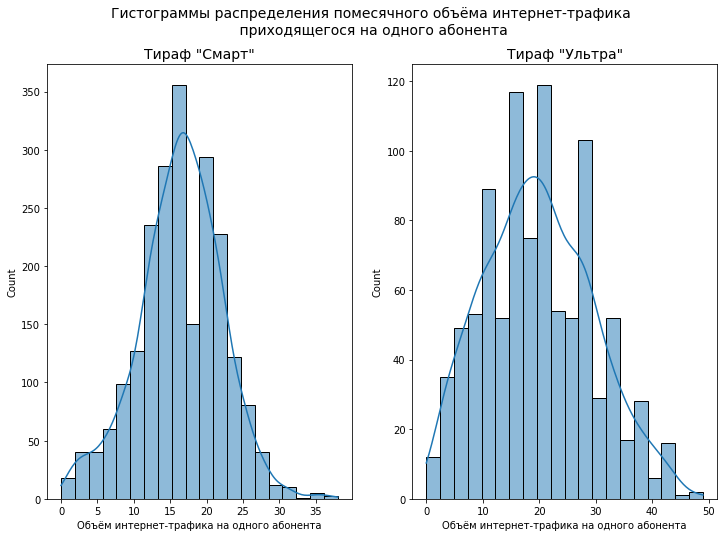

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
fig.suptitle('Гистограммы распределения помесячного объёма интернет-трафика\n приходящегося на одного абонента', fontsize=14)
axes[0].set_title('Тираф "Смарт"', fontsize=14)
axes[1].set_title('Тираф "Ультра"', fontsize=14)
axes[0].set_xlabel('Объём интернет-трафика на одного абонента')
axes[1].set_xlabel('Объём интернет-трафика на одного абонента')
sns.histplot(data = users_summary_smart.gb_used.melt().value, bins = 20, ax = axes[0], kde = True)
sns.histplot(data = users_summary_ultra.gb_used.melt().value, bins = 20, ax = axes[1], kde = True)
plt.show()

Оба распределения близки по внешнему виду к нормальному. 

Однако завышение левой стороны также присутствует, как и для продолжительности разговора, по причине неполного использования первого месяца, для абонентов подключившихся в 2018 году.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличная работа!

## Проверка статистических гипотез для тарифов "Смарт" и "Ультра"

### Гипотеза о различии средней выручки с пользователя для тарифов
Проверка о различии (равентсве) среднего двух генеральных совокупностей платежей пользователей тарифов "Смарт" и "Ультра" будет производить по двум предоставленным выборкам. Такую проверку можно провести используя t-тест, но должно быть выполнено 3 условия:
1. генеральные совокупности не должны зависеть друг от друга, будем считать это условие выполненым, так как маловероятно, что один клиент заключил несколько договоров на различные тарифные планы, а значит выборки парно не связаны,
2. выборочные средние должны быть нормально распределены, данное условие также выполнено согласно ЦПТ, размеры наших выборок 350 и 148, что достаточно для выполнения ЦПТ о распределении средних выборок,
3. размеры выборок и дисперсии рассматриваемых генеральных совокупностей должны быть равны или нужно указать их неравество в качестве аргумента. В нашем случае размеры выборок отличаются более чем в два раза, так что условие не выполнено, нужно это будет указать в качестве аргумента.

За нулевую гипотезу примем равенство средней выручки с пользователя для тарифов "Смарт" и "Ультра", альтервнативной гипотезой будет их раличие.
Уровень статистической значимости примем за 0.05.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> очень хорошо, что перед рассчетами явно описываешь нулевую и лаьтернативную гипотезы

In [47]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем нулевую гипотезу

results = st.ttest_ind(
    users_summary_smart.income.melt().value, 
    users_summary_ultra.income.melt().value,
    equal_var = False
)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, p-значение: ', results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-значение: ', results.pvalue) 
    
print(f'Среднее значение платежа пользователя тарифа "Смарт": {users_summary_smart.income.melt().value.mean():.2f}.\n'
     f'Среднее значение платежа пользователя тарифа "Ультра": {users_summary_ultra.income.melt().value.mean():.2f}.')

Отвергаем нулевую гипотезу, p-значение:  2.352616997557511e-53
Среднее значение платежа пользователя тарифа "Смарт": 681.10.
Среднее значение платежа пользователя тарифа "Ультра": 1132.77.


Нулевая гипотеза: "равенство средней выручки с пользователя для тарифов "Смарт" и "Ультра"" отвергнута, это значит нужно принять альтернативную гипотезу, а именно:

**Средняя выручка с пользователей тарифов "Смарт" и "Ультра" различаются.**

### Гипотеза о различии средней выручки с пользователей из Москвы и других регионов

Для начала сформируем выборки, для этого объединим выборки двух тарифов. Далее разобъем объединённую выборку по отношению пользователя к Москве.

In [48]:
# помесячная выручка со всех клиентов, обединение "Смарт" и "Ультра"
all_income = pd.concat([users_summary_smart.income, users_summary_ultra.income])
# помесячная выручка с Московских клиентов
all_income_mosсow = all_income[all_income.index.isin(users[users.city == 'Москва'].user_id)]
# помесячная выручка не с Московских клиентов
all_income_not_mosсow = all_income[all_income.index.isin(users[users.city != 'Москва'].user_id)]
print(f'Число пользователей из Москвы: {len(all_income_mosсow)}\n'
      f'Число пользователей не из Москвы: {len(all_income_not_mosсow)}')

Число пользователей из Москвы: 99
Число пользователей не из Москвы: 399


Проверка о различии (равентсве) среднего двух генеральных совокупностей платежей пользователей из Москвы и других регионов будет производить по двум предоставленным выборкам. Такую проверку можно провести используя t-тест, но должно быть выполнено 3 условия:
1. генеральные совокупности не должны зависеть друг от друга, будем считать это условие выполненым, так как маловероятно, что один клиент заключил несколько договоров для разных регионов, а значит выборки парно не связаны,
2. выборочные средние должны быть нормально распределены, данное условие также выполнено согласно ЦПТ, размеры наших выборок 99 и 399, что достаточно для выполнения ЦПТ о распределении средних выборок,
3. размеры выборок и дисперсии рассматриваемых генеральных совокупностей должны быть равны или нужно указать их неравество в качестве аргумента. В нашем случае размеры выборок отличаются в 4 раза, так что условие не выполнено, нужно это будет указать в качестве аргумента.

За нулевую гипотезу примем равенство средней выручки с пользователя для Москвы и других регионов, альтервнативной гипотезой будет их раличие.
Уровень статистической значимости примем за 0.05.

In [49]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем нулевую гипотезу

results = st.ttest_ind(
    all_income_mosсow.melt().value, 
    all_income_not_mosсow.melt().value,
    equal_var = False
)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, p-значение: ', results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-значение: ', results.pvalue) 

Не получилось отвергнуть нулевую гипотезу, p-значение:  0.2632579248252553


Нулевая гипотеза: "равенство средней выручки с пользователя для Москвы и других регионов" не отвергнута, это значит что принять альтернативную гипотезу оснований нет, а именно:

**Средняя выручка с пользователей из Москвы отличается от выручки с пользователй из других регионов, не находит статистического подтверждённия.**

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> работа с гипотезами проведена корректно!

## Общий вывод по исследованию.

В ходе исследования определены основные характеристики поведения пользователй для тарифов "Смарт" и "Ультра":

1. Среднее количество минут разговора на доного абонента в месяц:
 - тариф "Смарт" - 421.03,
 - тариф "Ультра" - 550.80.
2. Среднее количество сообщений на доного абонента в месяц:
 - тариф "Смарт" - 38.87,
 - тариф "Ультра" - 61.43.
3. Средний объём интернет-трафика приходящегося на доного абонента в месяц:
 - тариф "Смарт" - 16.39 ГБ,
 - тариф "Ультра" - 19.89 ГБ.
 

Проверены две гипотезы касающиесы выручки с пользователя:

1. Гипотеза о различии средней выручки с пользователя для тарифов "Смарт" и "Ультра" подтвердилась, со значимостью 5%, согласно выборок:
 - средний месячный платеж пользователя тарифа "Смарт": 681.10
 - средний месячный платеж пользователя тарифа "Ультра": 1132.77
2. Гипотеза о различии средней выручки с пользователя из Москвы и выручки с пользователей других регионов не подтвердираль, использован уровень значимости 5%.

Можно сделать вывод о том, что перспективным для развития является тариф "Ультра", также согласно предоставленной выборке число абонентов данного тарифа значительно меньше (148 - "Ультра", 350 - "Смарт").

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличный общий вывод!